# **Case Study - Diamond Price Prediction**

### **Business Understanding**

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### **Understanding the 4 C's**
- Cut
- Color
- Clarity
- Carat

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs


### **Problem Statement**
**Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and predicts the `price` of diamond.**



## **Import the required Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 - Load the Data**

In [2]:
df = pd.read_csv('/Users/pc/#/Projects/Diamond Price Prediction/diamonds.csv')

df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Data Description
Kindly find the data description for the features below:

| Feature | Description |
| :---: | :--- | 
| **price** | price in US dollars `($ 326 - $ 18,823)` |
| **carat** | weight of the diamond `(0.2 - 5.01)` |
| **cut** | quality of the cut `(Fair, Good, Very Good, Premium, Ideal)` |
| **color** | diamond colour, `(J (worst) to D (best))` |
| **clarity** | a measurement of how clear the diamond is `(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))` |
| **x** | length in mm `(0 - 10.74)` |
| **y** | width in mm `(0 - 58.9)` |
| **z** | depth in mm `(0 - 31.8)` |
| **depth** | total depth percentage = z / mean(x, y) = 2 * z / (x + y) `(43 - 79)` |
| **table** | width of top of diamond relative to widest point `(43 - 95)` |

## **Step 2 - Exploratory Data Analysis**

In [3]:
df.shape

(53940, 10)

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [50]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [51]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [52]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

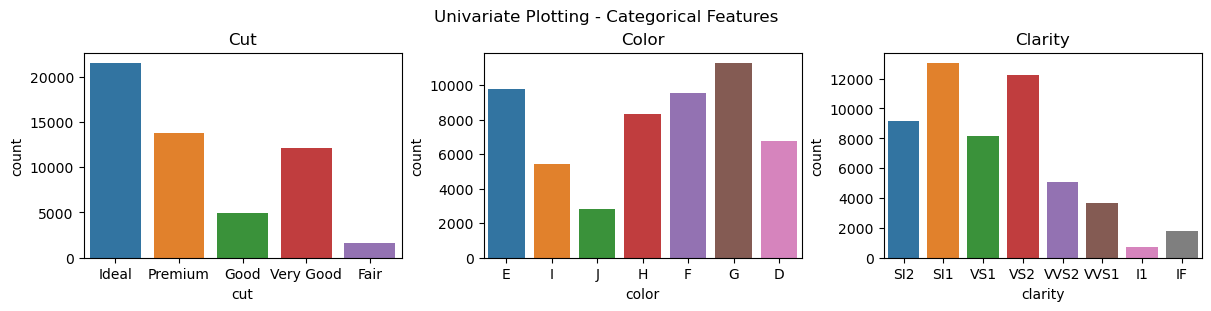

In [6]:
# Univariate - Categorical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Cut")
sns.countplot(data=df, x='cut', ax=axs[0])

axs[1].set_title("Color")
sns.countplot(data=df, x='color', ax=axs[1])

axs[2].set_title("Clarity")
sns.countplot(data=df, x='clarity', ax=axs[2])

* It looks like Fair Category(1610) in Cut column is insignificant/infrequent
* It looks like J Category(2808) in Color column is insignificant
* It looks like I1(741) and IF(1790) Categories in Clarity are infrequent

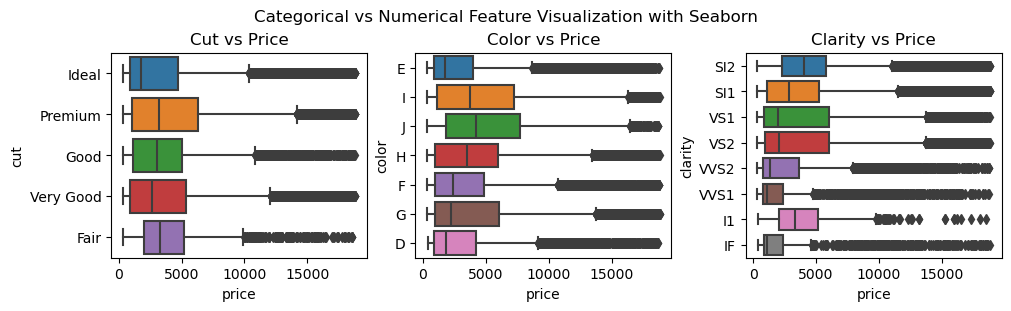

In [45]:
# Bivariate - Categorical vs Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Categorical vs Numerical Feature Visualization with Seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df, x='price', y='cut', ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot(data=df, x='price', y='color', ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df, x='price', y='clarity', ax=axs[2])

plt.show()

* Better cut diamonds (Ideal, Premium) tend to have higher median prices and wider price ranges than lower-quality cuts.
* Color has some effect on diamond pricing, but the relationship is weaker compared to cut.
* Clarity strongly affects pricing, with higher clarity diamonds (e.g., VVS1, IF) having higher median prices and a broader range of values.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Table'}, xlabel='table', ylabel='Count'>

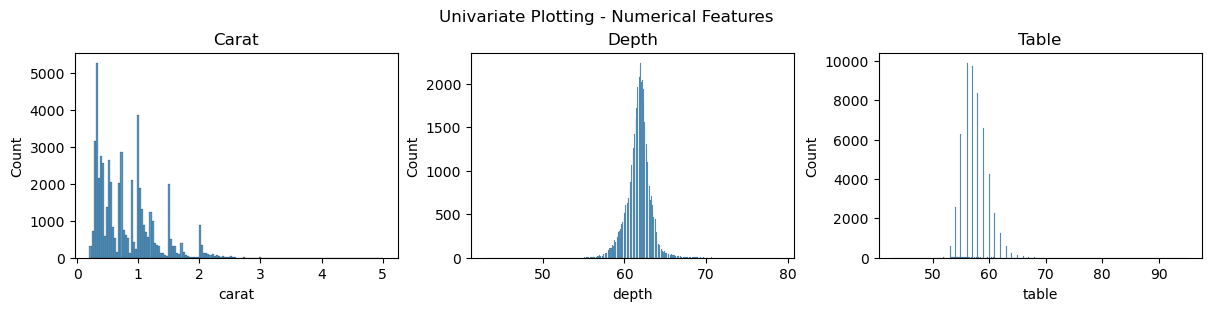

In [8]:
# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Carat")
sns.histplot(data=df, x='carat', ax=axs[0])

axs[1].set_title("Depth")
sns.histplot(data=df, x='depth', ax=axs[1])

axs[2].set_title("Table")
sns.histplot(data=df, x='table', ax=axs[2])

* It looks like depth follows Normal Distribution, I can't say by looking at its shape, I have to do some checks

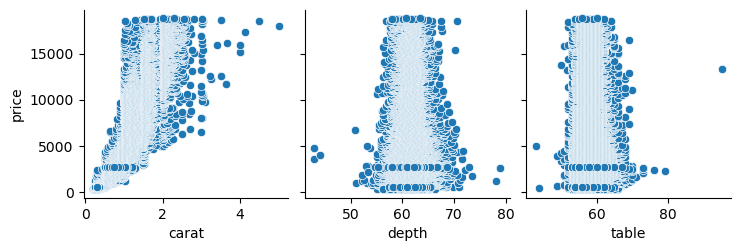

In [9]:
# Bivariate - Numerical vs Numerical Analysis

sns.pairplot(data=df,
           x_vars=['carat', 'depth', 'table'],
           y_vars='price')

* Carat weight is the strongest predictor of price among these variables.
* Depth and table don’t have a noticeable linear or non-linear relationship with price.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Z'}, xlabel='z', ylabel='Count'>

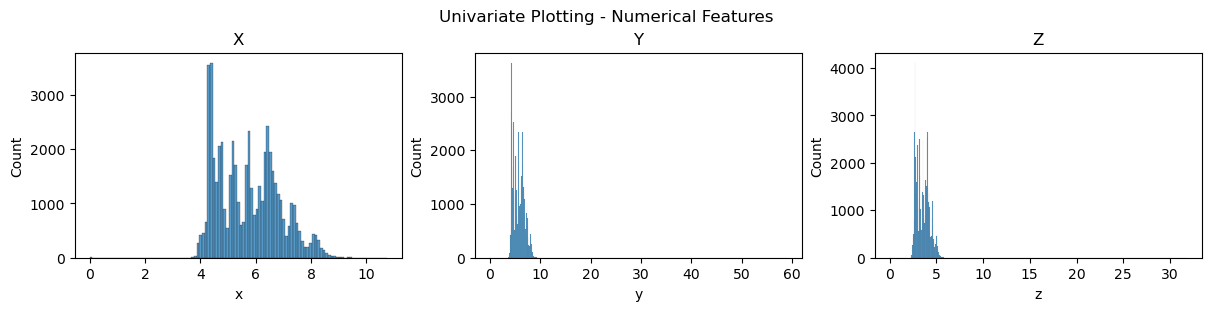

In [10]:
# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("X")
sns.histplot(data=df, x='x', ax=axs[0])

axs[1].set_title("Y")
sns.histplot(data=df, x='y', ax=axs[1])

axs[2].set_title("Z")
sns.histplot(data=df, x='z', ax=axs[2])

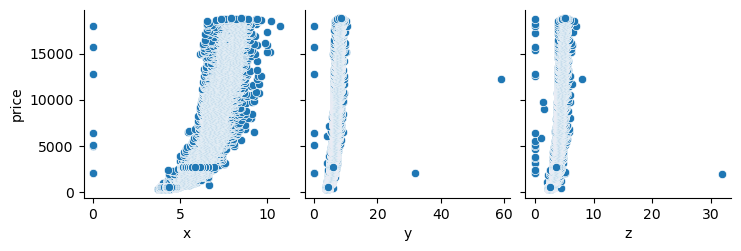

In [11]:
# Bivariate - Numerical vs Numerical Analysis

sns.pairplot(data=df,
           x_vars=['x', 'y', 'z'],
           y_vars='price')

* x (length) seems to have the strongest positive relationship with price among the three dimensions.
* Extreme outliers in y and z suggest potential data quality issues or unusual diamond cuts, which should be investigated further.

In [12]:
import sklearn

print(sklearn.__version__)

1.2.2


## **Step 3 - Segregate Inputs (X) and Output (y)**

In [13]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['price'])

y = df['price']

## **Step 4 - Split the data into Train and Test**

In [14]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


## **Step 5 - Apply Data Preparation on Training Data**

We will follow the below mentioned strategy:
1. Separate Numerical and Categorical Features
2. Feature Engineering/Extraction/Transformation
    - Applying Standardization on Numerical Features
    - Apply LabelEncoding on Categorical Features
  
**Note: We have skipped the Feature Cleaning Step under Data Preparation in this notebook.**

In [15]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

#### **Separate Numerical and Categorical Features**

In [16]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [17]:
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [18]:
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


#### **Numerical Feature Transformation (Implementation Available Below)**
1. Normalization
2. Standardization (We will use this method in this project)

#### **Categorical Feature Transformation (Implementation Available Below)**
1. One Hot Encoding
2. Label Encoding
3. Ordinal Encoding (We will us this method in this project)

#### **Numerical Feature Transformation: Applying Standardization**

In [19]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


In [20]:
# Let's now analyse the properties of 'std_scaler'

print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Output Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 6
Output Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.79755135 61.75490051 57.45233469  5.72994018  5.73356989  3.53818267]
Std of each column: [0.47428986 1.43216771 2.22888453 1.1225301  1.15188634 0.7097527 ]


In [21]:
# Let's also describe the transformed data statistics

X_train_num_transformed.describe().round(2)

,carat,depth,table,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.10,-6.48,-5.10,-4.98,-4.99
25%,-0.84,-0.46,-0.65,-0.91,-0.88,-0.89
50%,-0.21,0.10,-0.20,-0.04,-0.02,-0.03
75%,0.51,0.52,0.69,0.72,0.70,0.71
max,8.88,12.04,9.67,4.46,46.16,39.82


#### **Categorical Feature Transformation: Applying Ordinal Encoding**

As the three categorical features are ordinal, we will proceed with the Ordinal Encoding instead of One-Hot Encoding or Label Encoding

**Parameters**
1. categories: 'auto' or a list of array-like, default='auto'
    - 'auto' : Determine categories automatically from the training data.
    - list : This helps define ordering for categorical columns (lowest to highest)
2. handle_unknown: {'error', 'use_encoded_value'}, default='error'
    - When set to ‘error’ an error will be raised in case an unknown categorical feature is present during transform. When set to ‘use_encoded_value’, the encoded value of unknown categories will be set to the value given for the parameter `unknown_value`.
3. unknown_value: int, default=None
    - When the parameter *handle_unknown* is set to *use_encoded_value*, this parameter is required and will set the encoded value of unknown categories. 
4. min_frequency: int, default=None
    - Categories with a smaller cardinality will be considered infrequent.
5. encoded_missing_value: int
    - Encoded value of missing categories.

In [22]:
# Define the ordering for categorical columns (lowest to highest)

cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [23]:
# Create the OrdinalEncoder with the specified categories
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1, 
                                 encoded_missing_value=-5)

# Apply the encoding
X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat), 
                                     columns=ordinal_encoder.get_feature_names_out(), 
                                     index = X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
441,3.0,2.0,1.0
50332,2.0,6.0,2.0
35652,4.0,3.0,5.0
9439,2.0,2.0,4.0
15824,1.0,4.0,3.0


In [24]:
# Let's now analyse the properties of 'ordinal_encoder'

print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print("Unique Categories:", ordinal_encoder.categories_)
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object), array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object), array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)]
Feature Names after encoding: ['cut' 'color' 'clarity']


#### **Concatenate `X_train_num_transformed` and `X_train_cat_transformed`**

In [25]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,3.0,2.0,1.0
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,2.0,6.0,2.0
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4.0,3.0,5.0
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,2.0,2.0,4.0
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,1.0,4.0,3.0


## **Step 7 - Apply Data Preparation on Test Data**

**Note that, Step-6 is discussed after this.**

In [26]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [27]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064


In [28]:
# Apply transformation on Categorical data

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat), 
                                   columns = ordinal_encoder.get_feature_names_out(), 
                                   index = X_test_cat.index)

X_test_cat_transformed.head()

,cut,color,clarity
10176,4.0,2.0,1.0
16083,4.0,2.0,2.0
13420,3.0,1.0,2.0
20407,4.0,4.0,2.0
8909,2.0,4.0,3.0


In [29]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657,4.0,2.0,1.0
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803,4.0,2.0,2.0
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283,3.0,1.0,2.0
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144,4.0,4.0,2.0
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064,2.0,4.0,3.0


## **Step 6, 8 and 9 - Training and Testing Phase (Linear Regression)**

In [30]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 806.1632101815571

CPU times: user 26.6 ms, sys: 9.99 ms, total: 36.6 ms
Wall time: 49.9 ms


In [31]:
output_df = pd.DataFrame({'Actual': y_test})

In [32]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
10176,4733,5131.107679
16083,6424,7294.764679
13420,5510,6025.770217
20407,8770,9927.067650
8909,4493,4732.652453
...,...,...
52283,2494,3348.611770
10789,4861,4480.310760
1190,2932,3870.804522
3583,3422,4198.061830


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


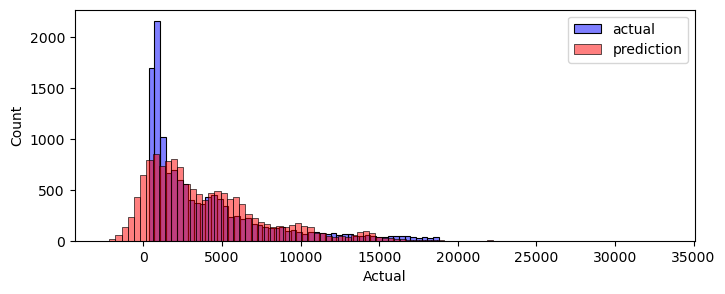

In [33]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (KNN Regression)**

In [34]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 381.07531331108635

CPU times: user 348 ms, sys: 6.06 ms, total: 354 ms
Wall time: 212 ms


In [35]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
10176,4733,5131.107679,4664.4
16083,6424,7294.764679,6278.2
13420,5510,6025.770217,5180.8
20407,8770,9927.067650,12080.0
8909,4493,4732.652453,6015.2
...,...,...,...
52283,2494,3348.611770,2445.2
10789,4861,4480.310760,4301.8
1190,2932,3870.804522,3569.6
3583,3422,4198.061830,3228.2


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


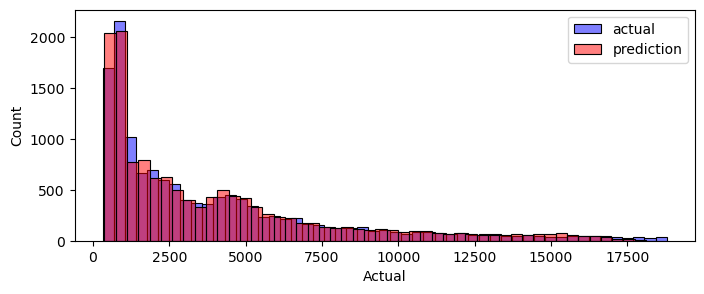

In [36]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (DT Regression)**

In [37]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 352.71234705228034

CPU times: user 523 ms, sys: 5.63 ms, total: 528 ms
Wall time: 180 ms


In [38]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
10176,4733,5131.107679,4664.4,4620.0
16083,6424,7294.764679,6278.2,7109.0
13420,5510,6025.770217,5180.8,5190.0
20407,8770,9927.067650,12080.0,12477.0
8909,4493,4732.652453,6015.2,4134.0
...,...,...,...,...
52283,2494,3348.611770,2445.2,2442.0
10789,4861,4480.310760,4301.8,4028.0
1190,2932,3870.804522,3569.6,2721.0
3583,3422,4198.061830,3228.2,2852.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


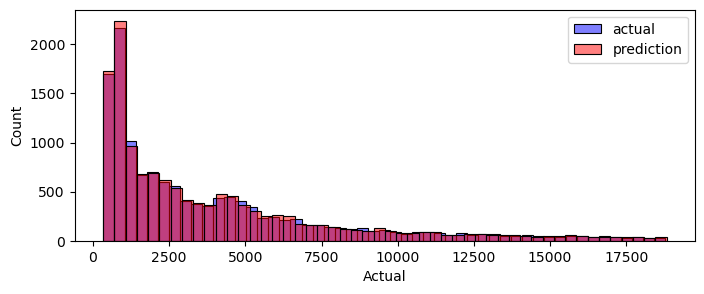

In [39]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (Random Forest Regression)**

In [40]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 268.2149901636739

CPU times: user 9.95 s, sys: 90 ms, total: 10 s
Wall time: 9.71 s


In [41]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
10176,4733,5131.107679,4664.4,4620.0,4819.390000
16083,6424,7294.764679,6278.2,7109.0,7064.730000
13420,5510,6025.770217,5180.8,5190.0,5275.160000
20407,8770,9927.067650,12080.0,12477.0,11408.390000
8909,4493,4732.652453,6015.2,4134.0,4772.430000
...,...,...,...,...,...
52283,2494,3348.611770,2445.2,2442.0,2449.960000
10789,4861,4480.310760,4301.8,4028.0,4410.300000
1190,2932,3870.804522,3569.6,2721.0,3075.510667
3583,3422,4198.061830,3228.2,2852.0,2863.190000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


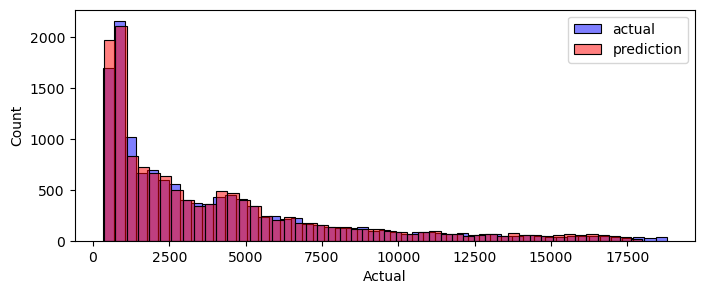

In [42]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Comparing all the Models**

In [43]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,4733.0
1,Actual,6424.0
2,Actual,5510.0
3,Actual,8770.0
4,Actual,4493.0


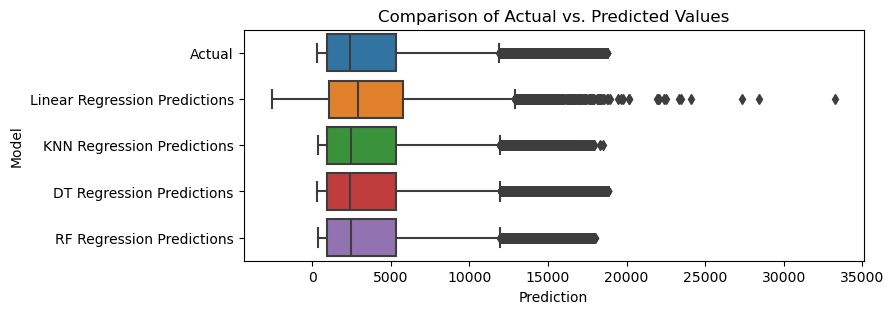

In [44]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

* Random Forest Regression performs the best in capturing the actual distribution of values, with minimal outliers and a well-aligned median.
* Linear Regression struggles with outliers and overestimates the variability in prices.
* KNN Regression underfits, failing to capture the full spread of the data.
* Decision Tree Regression performs decently but may introduce slightly more noise compared to Random Forest.